# **Project - Twitter Sentiment Analysis**

Let's first start by importing modules

In [ ]:
import pandas as pd
import numpy as np
import nltk 
import re
import future
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lets add path to mount the dataset from google drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Lets create dataframe using pandas imported as pd

In [ ]:
df = pd.read_csv('tweet.csv',encoding = 'latin', header=None) # Adding csv path here
# adding column names
df = df.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})

In [ ]:
#showing first ten rows to visualize the dataset
df.head(10)

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [ ]:
# Short forms are replaced with their full forms for better preprocessing
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
# Replaciong emojis with their corresponding sentiments
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [ ]:
# Processing the tweet
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

In [ ]:
tweet = df.columns.values[5]

In [ ]:
#Adding a processed tweet column
df['processed_tweet'] = np.vectorize(process_tweet)(df[tweet])

<AxesSubplot:>

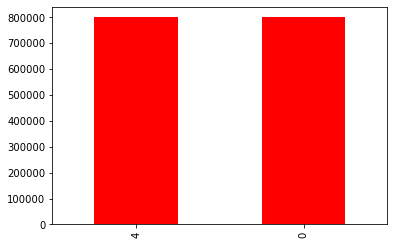

In [ ]:
# count plot to show the positive(4) and negative(0) sentiments
df['target'].value_counts().plot.bar(color = 'red', figsize = (6, 4))

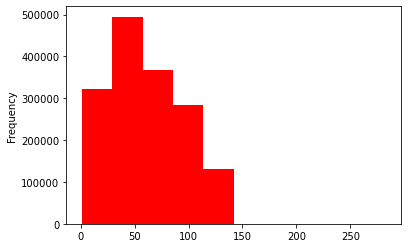

In [ ]:
# Plot : Frequency vs Length of tweet
length_train = df['processed_tweet'].str.len().plot.hist(color = 'red', figsize = (6, 4))

In [ ]:
# Installing world cloud
#conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

Note: you may need to restart the kernel to use updated packages.

  environment location: C:\Users\mohit\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_1

The following packages will be UPDATED:

  conda                               4.10.0-py38haa244fe_1 --> 4.10.1-py38haa244fe_0




wordcloud-1.8.1      | 196 KB    |            |   0% 
wordcloud-1.8.1      | 196 KB    | 8       

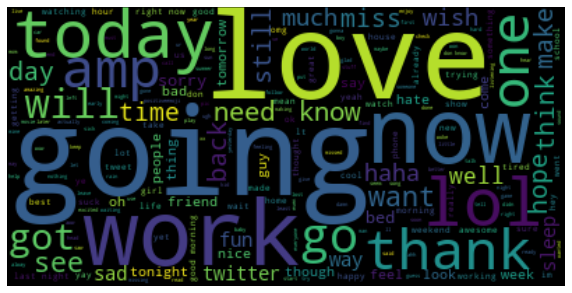

In [ ]:
#Word Clould for pre-processed tweets
all_words = ' '.join([text for text in df['processed_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud().generate(all_words)
plt.figure(figsize =(10,7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

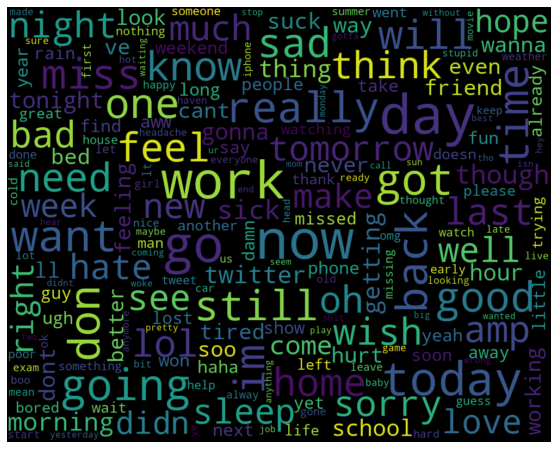

In [ ]:
#Word Clould for Negative Sentiments
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tar1 = df["target"] == 0   #Negative Sentiments
Real = df[tar1]
All_Words = ' '.join([processed_tweet for processed_tweet in Real.processed_tweet])
wordcloud = WordCloud(width= 1000, height= 800, max_font_size = 100, collocations = False).generate(All_Words)
plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

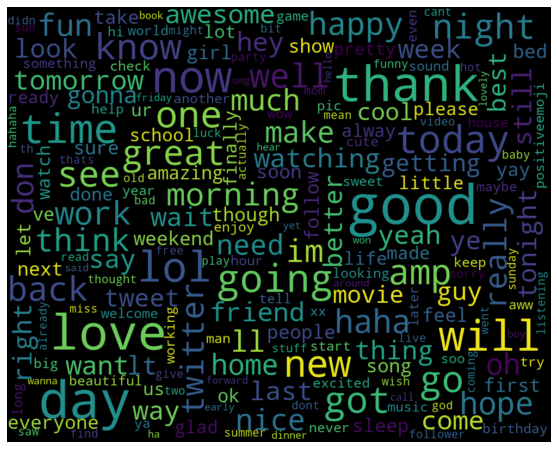

In [ ]:
#Word Clould for Positive Sentiments
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tar1 = df["target"] == 4   #Positive Sentiments
Real = df[tar1]
All_Words = ' '.join([processed_tweet for processed_tweet in Real.processed_tweet])
wordcloud = WordCloud(width= 1000, height= 800, max_font_size = 100, collocations = False).generate(All_Words)
plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Splitting the dataset into train and test

#***Classifier 1***

In [ ]:
#Implementing Text Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['processed_tweet'])  
final_vectorized_data

<1600000x3653479 sparse matrix of type '<class 'numpy.int64'>'
	with 34781330 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df[df.columns.values[0]],
                                                    test_size=0.2, random_state=69)

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

In [ ]:
#Finding accuracy of Multinomial Naive Bayes
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.80203125


In [ ]:
#Print Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

#Checking performance our model with classification report
print(classification_report(y_test, predicted_naive))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, predicted_naive)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81    159808
           4       0.82      0.78      0.80    160192

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Area Under the Curve =  0.8020625474700683


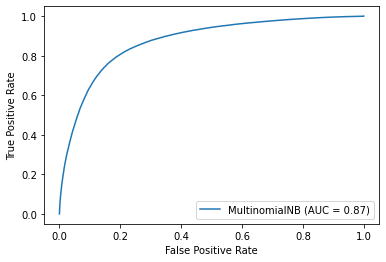

In [ ]:
#Plotting ROC curve
metrics.plot_roc_curve(model_naive, X_test, y_test)  
plt.show()  

#***Classifier 2***

In [ ]:
#Classification with Linear SVC
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train, y_train) 
y_svr_lin_predicted = svr_lin.predict(X_test)

In [ ]:
score_svr_lin = accuracy_score(y_svr_lin_predicted, y_test)
print("Accuracy with Naive-bayes: ",score_svr_lin)

Accuracy with Naive-bayes:  0.800734375


In [ ]:
#Checking performance our model with classification report
print(classification_report(y_test, y_svr_lin_predicted))

#Checking performance our model with ROC Score
roc_score_cnb = roc_auc_score(y_test, y_svr_lin_predicted)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159808
           4       0.80      0.81      0.80    160192

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Area Under the Curve =  0.800723299291551


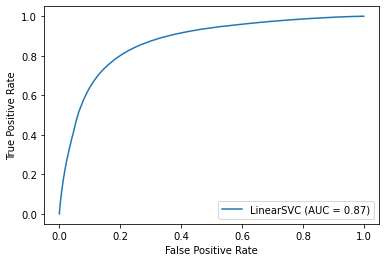

In [ ]:
metrics.plot_roc_curve(svr_lin, X_test, y_test)  
plt.show()  

#***Classifier 3***

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df[df.columns.values[0]],
                                                    test_size=0.2, random_state=69)

In [ ]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
score_lr = accuracy_score(y_pred, y_test)
print("Accuracy with Logistic Regeression:", score_lr)

Accuracy with Logistic Regeression: 0.814675


In [ ]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81    159808
           4       0.80      0.84      0.82    160192

    accuracy                           0.81    320000
   macro avg       0.82      0.81      0.81    320000
weighted avg       0.82      0.81      0.81    320000

Area Under the Curve =  0.8146435855867633


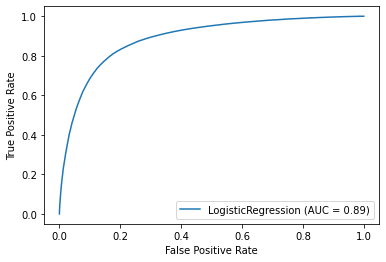

In [ ]:
metrics.plot_roc_curve(model, X_test, y_test)  
plt.show()  

#***Classifier 4***

In [ ]:
#Implementing SVC
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

y_pred1 = svm_clf.predict(X_test)

In [ ]:
score_svm = accuracy_score(y_pred1, y_test)
print("Accuracy with SVM:", score_svm)

In [ ]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred1))

#Checking performance our model with ROC Score
roc_score_svm = roc_auc_score(y_test, y_pred1)
print("Area Under the Curve = ",roc_score_svm)

In [ ]:
metrics.plot_roc_curve(svm_clf, X_test, y_test)  
plt.show()  

#***Classifier 5***

In [ ]:
#Implementing Xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

In [ ]:
score_xgb = accuracy_score(y_pred, y_test)
print("Accuracy with xgboost:", score_xgb)

In [ ]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred)
print("Area Under the Curve = ",roc_score_cnb)

#***Classifier 6***

In [ ]:
#Implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
score_dt = accuracy_score(y_pred, y_test)
print("Accuracy with Decision Tree:", score_dt)

In [ ]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred)
print("Area Under the Curve = ",roc_score_cnb)